In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [228]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [229]:
df.shape

(9240, 37)

In [230]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [232]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [233]:
#dropping columns which has null values greater than 3000

for a in df.columns:
    if df[a].isnull().sum()>3000:
        df.drop(a,axis=1,inplace=True)

In [234]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [235]:
df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [236]:
df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [237]:
#dropping clumns City and country since both these columns dopesn't hold much significane

df.drop(['City'],axis=1,inplace=True)

In [238]:
df.drop(['Country'],axis=1,inplace=True)

In [239]:
## chekcing null values again

df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [240]:
#Finding the columns which contains Select as value which is inderctly a Null since user has not selected any from the dropdown.

df.columns[df.isin(['Select']).any()]  # df.isin([response])

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile'], dtype='object')

In [241]:
#finding count of 'Select' in each of these 3 columns

In [242]:
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [243]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [244]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [245]:
df.drop('Lead Profile',axis=1,inplace=True)

In [246]:
df.drop('How did you hear about X Education',axis=1,inplace=True)

In [247]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [248]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [249]:
# below columns which has values as only NO and then dropping them

#df['I agree to pay the amount through cheque'].value_counts(dropna=False) #- NO
#df['Get updates on DM Content'].value_counts(dropna=False) - NO##
#df['Update me on Supply Chain Content'].value_counts(dropna=False) - NO
#df['Receive More Updates About Our Courses'].value_counts(dropna=False) - NO
#df['Through Recommendations'].value_counts(dropna=False) - NO 9233 yes 7
#df['Digital Advertisement'].value_counts(dropna=False) -No 9236 y 4
#df['Newspaper'].value_counts(dropna=False) - no9239 Y1
#df['X Education Forums'].value_counts(dropna=False) - NO
#df['Newspaper Article'].value_counts(dropna=False) - NO
#df['Magazine'].value_counts(dropna=False) -NO
#df['Do Not Email'].value_counts(dropna=False) ------don't drop
#df['Do Not Call'].value_counts(dropna=False)
#df['Search'].value_counts(dropna=False) - NO

df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [250]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [251]:
# chekcing value in below columns and since it has mostly 1 value of large count drop the cloumn
df['What matters most to you in choosing a course'].value_counts(dropna=False)
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [252]:
#checking null values after dropping many columns

df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [253]:
#dropping rows which has null values in 'what is your organisation' column and checking null values again

df=df[~pd.isnull(df['What is your current occupation'])]

In [254]:
df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [255]:
#dropping rows which has null values in 'Total visits' column and checking null values again

df=df[~pd.isnull(df['TotalVisits'])]

In [256]:
df.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [257]:
#dropping rows which has null values in 'Lead Source' column and checking null values again

df=df[~pd.isnull(df['Lead Source'])]

In [258]:
df.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [259]:
#dropping rows which has null values in 'Specialization' column and checking null values again

df=df[~pd.isnull(df['Specialization'])]

In [260]:
df.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [261]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [262]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [263]:
#dropping 'Prospect ID' and 'Lead Number'
df.drop(['Prospect ID','Lead Number'],axis=1, inplace=True)

## Identifying catergorical varibale for dummy varaibel creation

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

In [265]:
# variables except 'Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit' are categorical variables

# Creating dummy variables using the 'get_dummies' command
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], dtype=int,drop_first=True)
dummy1.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [266]:
# Add the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [267]:
# Creating dummy variable separately column 'Specialization' as it has the level 'Select' hence drop that level by specifying it explicitly.

m1 = pd.get_dummies(df['Specialization'], prefix = 'Specialization',dtype=int)
m1.drop(['Specialization_Select'], axis=1,inplace=True)
df = pd.concat([df, m1], axis = 1)

In [268]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Dropping the variables for which the dummy variables have been created

df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1,inplace=True)

In [270]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Test Train split

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
#putting feature varibale to X

X = df.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
#putting response varaible to Y
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [274]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [275]:
from sklearn.preprocessing import StandardScaler

In [276]:
scaler=StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at correlations

In [277]:
#importing matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

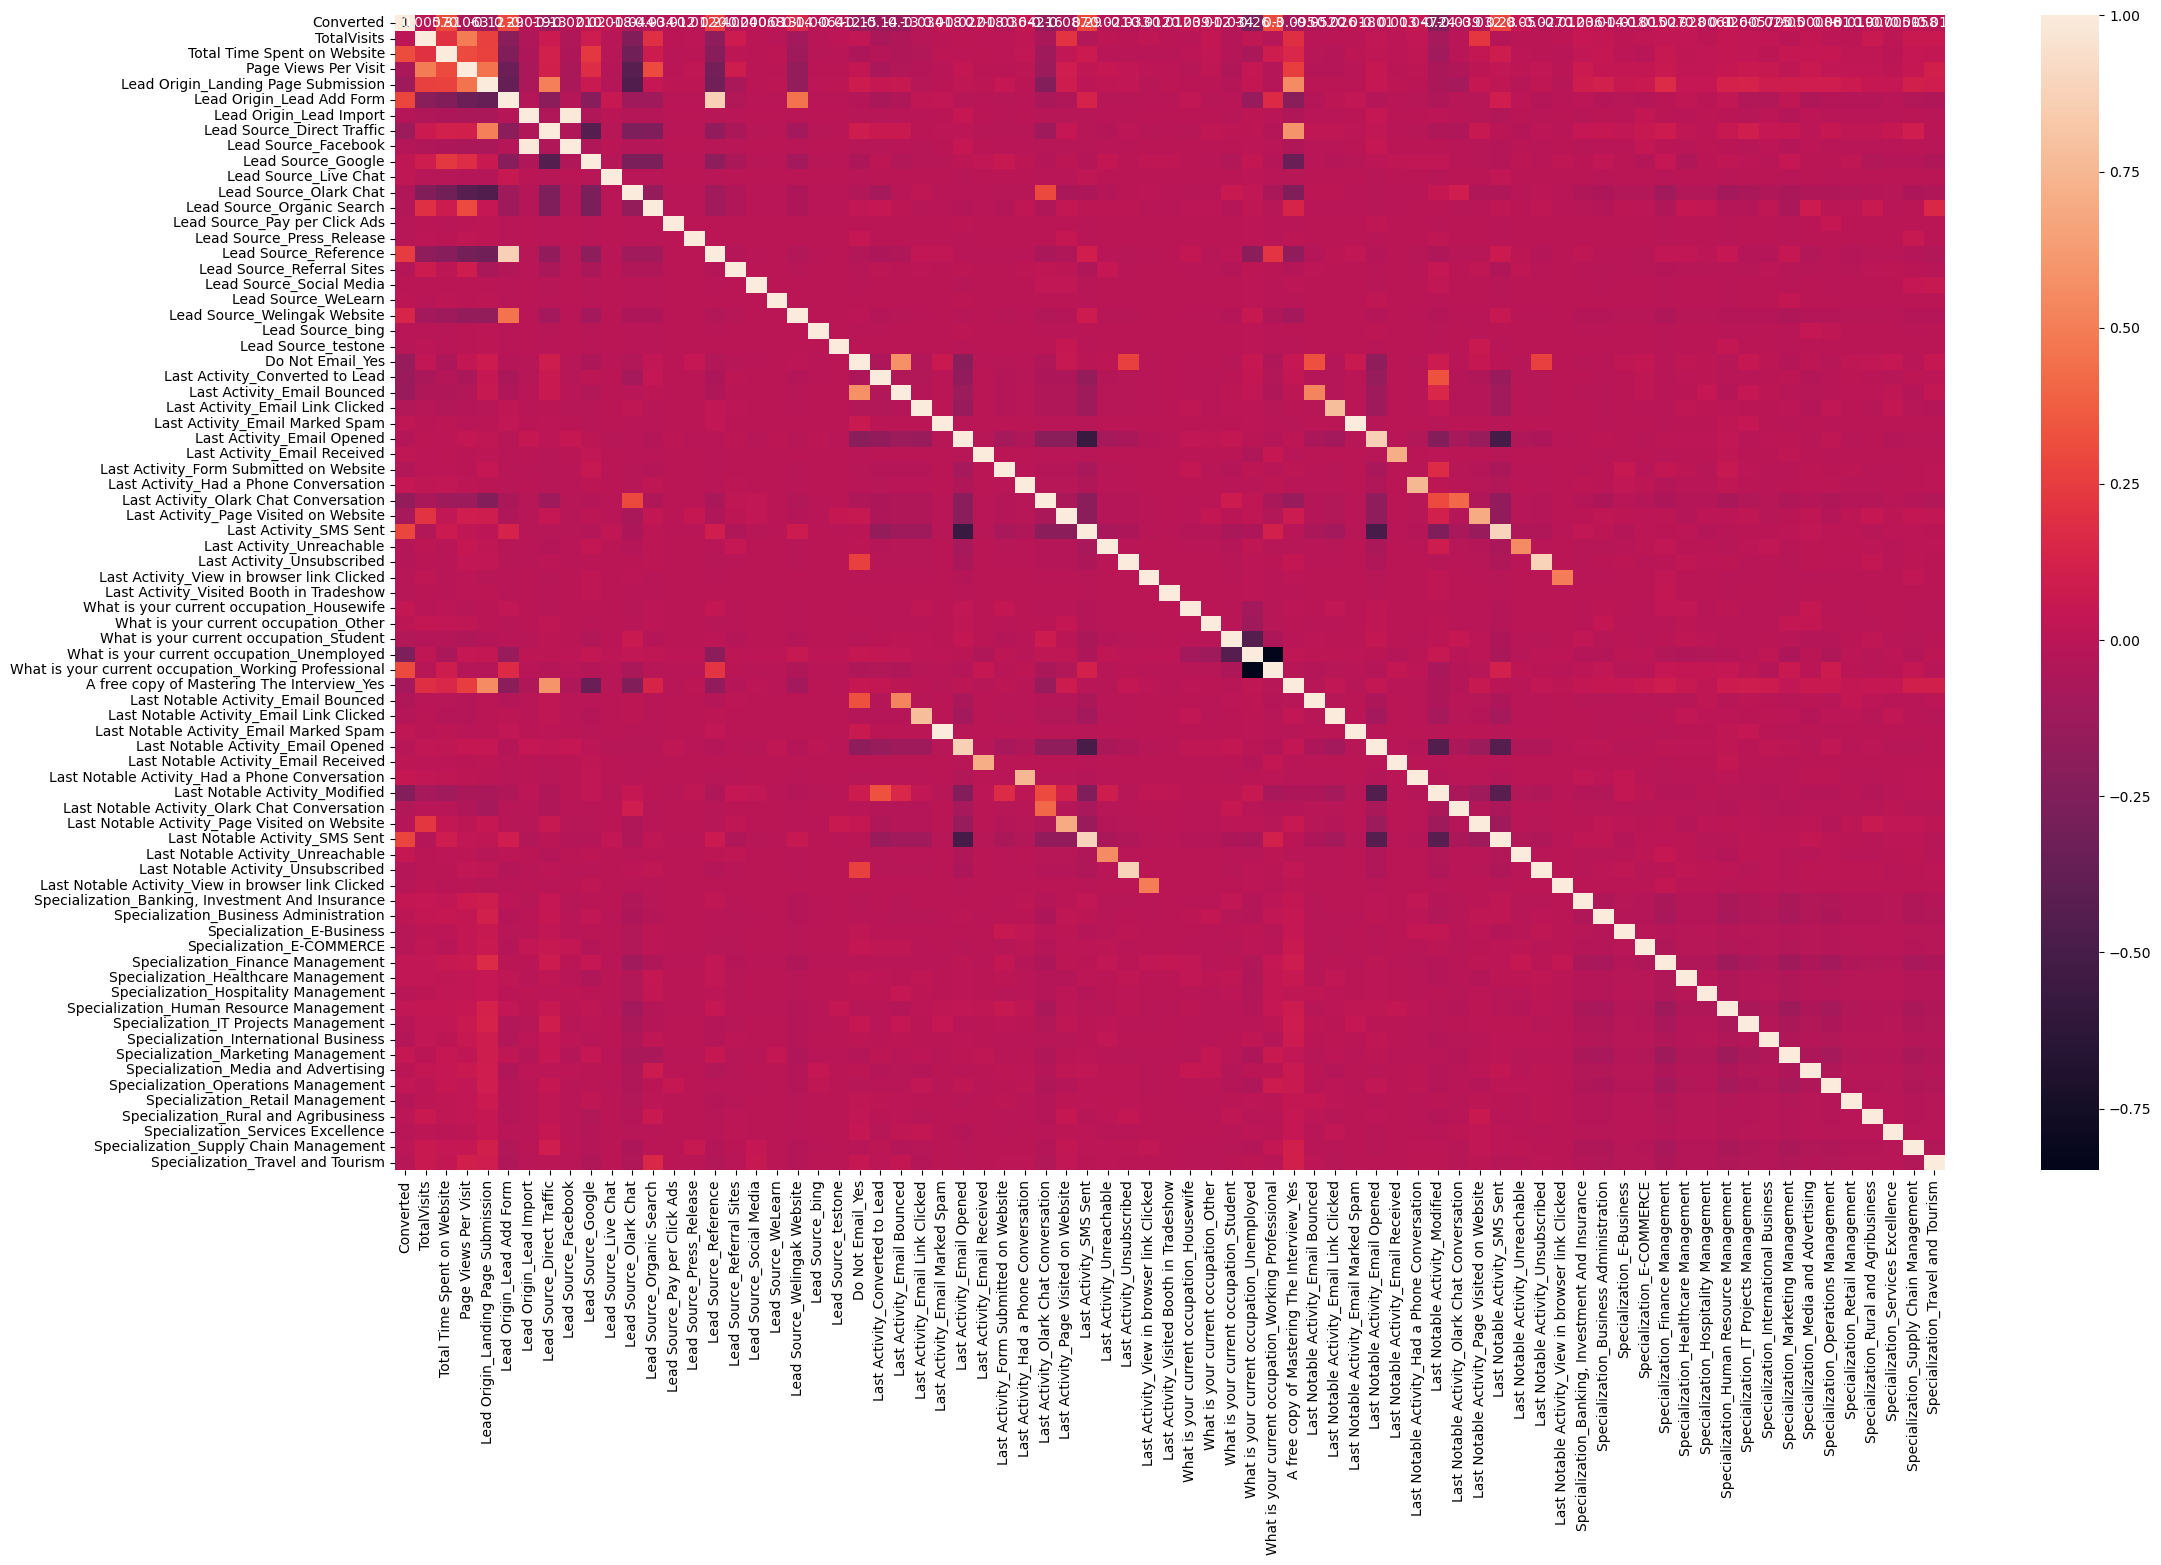

In [278]:
#Identify Correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Running first training model

In [279]:
import statsmodels.api as sm

In [280]:
#logistic regression model

logml = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Apr 2024   Deviance:                   1.4147e+05
Time:                        11:40:24   Pearson chi2:                 6.92e+18
No. Iterations:                    25   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -4.294e+15   8.85e+07  -4.85e+07      0.000   -4.29e+15   -4.29e+15
TotalVisits                                           4.139e+13   1.17e+06   3.53e+07      0.000    4.14e+13    4.14e+13
Total Time Spent on Website                           4.188e+14   1.16e+06   3.61e+08      0.000    4.19e+14    4.19e+14
Page Views Per Visit                                 -6.409e+14   1.48e+06  -4.34e+08      0.000   -6.41e+14   -6.41e+14
Lead Origin_Landing Page Submission                   1.492e+14   3.81e+06   3.91e+07      0.000    1.49e+14    1.49e+14
Lead Origin_Lead Add Form                             4.015e+15   4.77e+07   8.43e+07      0.000    4.01e+15    4.01e+15
Lead Origin_Lead Import                               3.764e+15   4.21e+07   8.94e+07      0.000    3.76e+15    3.76e+15
Lead Source_Direct Traffic                            7.404e+15   8.26e+07   8.97e+07      0.000     7.4e+15     7.4e+15
Lead Source_Facebook                                  3.764e+15   4.21e+07   8.94e+07      0.000    3.76e+15    3.76e+15
Lead Source_Google                                    8.105e+15   8.25e+07   9.82e+07      0.000    8.11e+15    8.11e+15
Lead Source_Live Chat                                 6.632e+15   8.24e+07   8.05e+07      0.000    6.63e+15    6.63e+15
Lead Source_Olark Chat                                7.714e+15   8.25e+07   9.35e+07      0.000    7.71e+15    7.71e+15
Lead Source_Organic Search                            8.751e+15   8.26e+07   1.06e+08      0.000    8.75e+15    8.75e+15
Lead Source_Pay per Click Ads                         2.678e+15   1.06e+08   2.52e+07      0.000    2.68e+15    2.68e+15
Lead Source_Press_Release                             6.685e+15   1.07e+08   6.25e+07      0.000    6.69e+15    6.69e+15
Lead Source_Reference                                 3.961e+15   6.74e+07   5.88e+07      0.000    3.96e+15    3.96e+15
Lead Source_Referral Sites                            8.971e+15   8.31e+07   1.08e+08      0.000    8.97e+15    8.97e+15
Lead Source_Social Media                              -224.0685   2.66e-06  -8.42e+07      0.000    -224.069    -224.069
Lead Source_WeLearn                                   1.047e+16   1.06e+08   9.83e+07      0.000    1.05e+16    1.05e+16
Lead Source_Welingak Website                          6.799e+15   6.77e+07      1e+08      0.000     6.8e+15     6.8e+15
Lead Source_bing                                      3.408e+15   9.52e+07   3.58e+07      0.000    3.41e+15    3.41e+15
Lead Source_testone                                   2.651e+15   1.06e+08   2.49e+07      0.000    2.65e+15    2.65e+15
Do Not Email_Yes                                     -6.00

## Feature selection using RFE

In [281]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [282]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [283]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link

In [285]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [286]:
#selcting train set with rfe columns
X_train = X_train[col]

In [287]:
#seeing which columns that were selected
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Acceesing the model with StatsModels

In [288]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Mon, 08 Apr 2024   Deviance:                       4077.4
Time:                        11:40:28   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Do Not Email_Yes                                        -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
========================================================================================================================
"""

## VIF

In [289]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.15
3,Lead Source_Reference,65.19
4,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.43
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
11,What is your current occupation_Working Profes...,1.31


In [290]:
# since columns 'Lead Source_Reference' has High VIF and P value lets drop that 
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

## Model 2

In [291]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.1
Date:                Mon, 08 Apr 2024   Deviance:                       4078.2
Time:                        11:40:29   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6590      0.602      1.095      0.273      -0.520       1.838
Total Time Spent on Website                              1.0948      0.046     23.672      0.000       1.004       1.185
Lead Origin_Lead Add Form                                4.0401      0.256     15.794      0.000       3.539       4.541
Lead Source_Olark Chat                                   1.2976      0.114     11.340      0.000       1.073       1.522
Lead Source_Welingak Website                             2.0535      1.037      1.980      0.048       0.020       4.087
Do Not Email_Yes                                        -1.4149      0.193     -7.325      0.000      -1.794      -1.036
Last Activity_Had a Phone Conversation                   1.6255      0.984      1.652      0.099      -0.303       3.554
Last Activity_SMS Sent                                   0.9929      0.084     11.774      0.000       0.828       1.158
What is your current occupation_Housewife               22.4142   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3317      0.639     -2.084      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4586      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1503      0.632      1.821      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4824   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8434      0.090     -9.403      0.000      -1.019      -0.668
Last Notable Activity_Unreachable                        2.4700      0.807      3.062      0.002       0.889       4.051
========================================================================================================================
"""

In [292]:
# VIF for Model 2

vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


In [293]:
# dropping column 'Last Notable Activity_Had a Phone Conversation' since it has high P value and VIF
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

## Model 3

In [294]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Mon, 08 Apr 2024   Deviance:                       4082.2
Time:                        11:40:29   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6621      0.602      1.101      0.271      -0.517       1.841
Total Time Spent on Website                              1.0934      0.046     23.650      0.000       1.003       1.184
Lead Origin_Lead Add Form                                4.0398      0.256     15.790      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2964      0.114     11.329      0.000       1.072       1.521
Lead Source_Welingak Website                             2.0524      1.037      1.978      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4145      0.193     -7.323      0.000      -1.793      -1.036
Last Activity_Had a Phone Conversation                   2.8923      0.799      3.621      0.000       1.327       4.458
Last Activity_SMS Sent                                   0.9911      0.084     11.756      0.000       0.826       1.156
What is your current occupation_Housewife               21.4143   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
What is your current occupation_Student                 -1.3321      0.639     -2.085      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4585      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1492      0.632      1.819      0.069      -0.089       2.387
Last Notable Activity_Modified                          -0.8522      0.090     -9.511      0.000      -1.028      -0.677
Last Notable Activity_Unreachable                        2.4663      0.807      3.057      0.002       0.885       4.047
========================================================================================================================
"""

In [295]:
#VIF for Model 3

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
11,Last Notable Activity_Modified,1.56
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.04


In [296]:
# dropping column 'What is your current occupation_Housewife' with High VIF
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

## Model 4

In [297]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.1
Date:                Mon, 08 Apr 2024   Deviance:                       4086.2
Time:                        11:40:29   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.148      0.032       0.104       2.270
Total Time Spent on Website                              1.0930      0.046     23.647      0.000       1.002       1.184
Lead Origin_Lead Add Form                                4.0395      0.256     15.792      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2949      0.114     11.315      0.000       1.071       1.519
Lead Source_Welingak Website                             2.0525      1.037      1.979      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4186      0.193     -7.334      0.000      -1.798      -1.039
Last Activity_Had a Phone Conversation                   2.8916      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9914      0.084     11.760      0.000       0.826       1.157
What is your current occupation_Student                 -1.8569      0.593     -3.131      0.002      -3.019      -0.695
What is your current occupation_Unemployed              -1.9833      0.554     -3.581      0.000      -3.069      -0.898
What is your current occupation_Working Professional     0.6242      0.585      1.067      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8508      0.090     -9.502      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4648      0.807      3.054      0.002       0.883       4.046
========================================================================================================================
"""

In [298]:
#VIF for Model 4

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
10,Last Notable Activity_Modified,1.56
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
9,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04


In [299]:
# dropping 'What is your current occupation_Working Professional' with high P value
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

## Model 5

In [300]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.7
Date:                Mon, 08 Apr 2024   Deviance:                       4087.3
Time:                        11:40:29   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7491      0.188      9.296      0.000       1.380       2.118
Total Time Spent on Website                    1.0931      0.046     23.647      0.000       1.003       1.184
Lead Origin_Lead Add Form                      4.0410      0.256     15.799      0.000       3.540       4.542
Lead Source_Olark Chat                         1.2964      0.114     11.330      0.000       1.072       1.521
Lead Source_Welingak Website                   2.0508      1.037      1.977      0.048       0.018       4.084
Do Not Email_Yes                              -1.4175      0.193     -7.328      0.000      -1.797      -1.038
Last Activity_Had a Phone Conversation         2.8940      0.799      3.624      0.000       1.329       4.459
Last Activity_SMS Sent                         0.9945      0.084     11.810      0.000       0.829       1.159
What is your current occupation_Student       -2.4199      0.284     -8.513      0.000      -2.977      -1.863
What is your current occupation_Unemployed    -2.5468      0.188    -13.542      0.000      -2.915      -2.178
Last Notable Activity_Modified                -0.8510      0.090     -9.504      0.000      -1.026      -0.675
Last Notable Activity_Unreachable              2.4662      0.807      3.056      0.002       0.885       4.048
==============================================================================================================
"""

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.19
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.51
9,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.34
3,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


In [302]:
# getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.330830
218     0.089677
4171    0.073881
4037    0.370009
3660    0.961093
207     0.120614
2044    0.123308
6411    0.913736
6498    0.051875
2085    0.986118
dtype: float64

In [303]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33083001, 0.08967657, 0.07388062, 0.37000908, 0.96109341,
       0.1206137 , 0.12330796, 0.91373557, 0.05187475, 0.98611847])

## Creating a dataframe with actual conversion flag and predicted probabilites

In [304]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.330830
1,0,0.089677
2,1,0.073881
3,1,0.370009
4,1,0.961093


## Creating new column 'Predicted' with 1 if Converison_Prob > 0.5 else 0

In [305]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.330830,0
1,0,0.089677,0
2,1,0.073881,0
3,1,0.370009,0
4,1,0.961093,1


In [306]:
from sklearn import metrics

In [307]:
# confusion Metrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[1939  373]
 [ 559 1590]]


In [308]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910782335799148


## Metrics beyond simply accuracy

In [309]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [310]:
#sensitivity
TP/(TP+FN)

0.7398790134946487

In [311]:
# Calculating the 'specificity'
TN/(TN+FP)

0.8386678200692042

## Plotting ROC curve

In [312]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [313]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

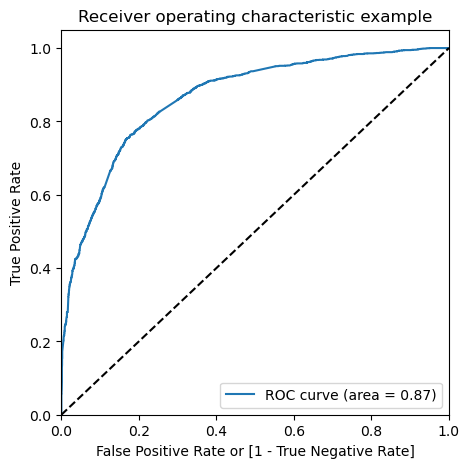

In [314]:
#Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Finding optimal cutoff

In [315]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1


In [316]:
## values of accuracy, sensitivity, and specificity for various probability cutoff's

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.572517  0.986040  0.188149
0.2   0.2  0.689980  0.949744  0.448529
0.3   0.3  0.765523  0.898557  0.641869
0.4   0.4  0.787267  0.805491  0.770329
0.5   0.5  0.791078  0.739879  0.838668
0.6   0.6  0.773593  0.668683  0.871107
0.7   0.7  0.740417  0.550954  0.916522
0.8   0.8  0.707241  0.442066  0.953720
0.9   0.9  0.659493  0.312238  0.982266


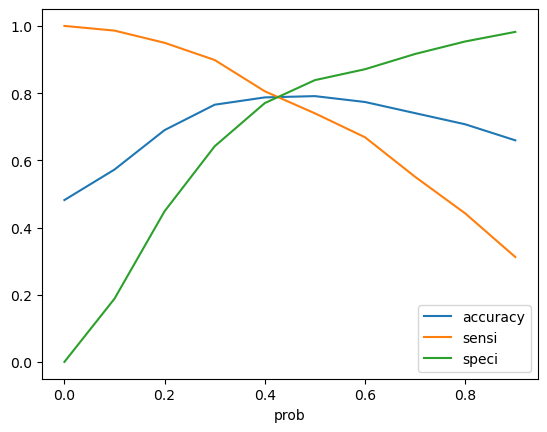

In [317]:
# Let's plot these values

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [318]:
# We can observe that the cut off is near 0.42 so lets choose it as cutoff and prepare new cloumn with this cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


## Precision and Recall

In [319]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

## Precision = TP / TP + FP

In [320]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8099847172694855

## Recall = TP / TP + FN

In [321]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7398790134946487

## Precision Recall Tradeoff

In [322]:
from sklearn.metrics import precision_recall_curve

In [323]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [324]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

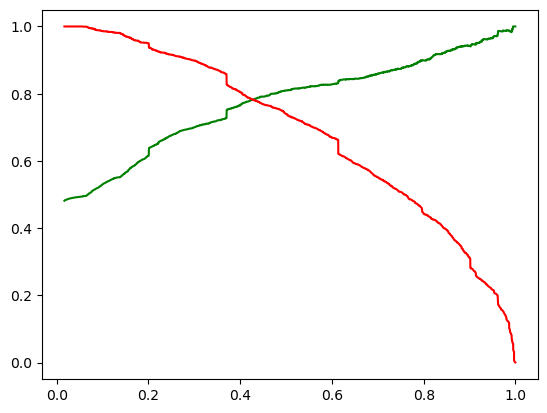

In [325]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the Test Set

In [334]:
# Making predictions on the test set

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [335]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,0.615423,-0.826165,2.219752,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,0.064874,0.733689,0.753710,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6570,-0.118642,0.581422,0.265029,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.798939,0.646932,0.753710,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [336]:
X_test.shape

(1912, 74)

In [337]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,-0.943022,1,0,1,0,0,0,1,0,0,0,1,0,0,0
6122,-0.826165,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9202,0.733689,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6570,0.581422,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2668,0.646932,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [338]:
X_test.shape

(1912, 15)

In [339]:
X_test_sm = sm.add_constant(X_test)

In [341]:
X_test_sm.shape

(1912, 16)

In [342]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [343]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [344]:
y_test_pred[:10]

4771    0.996839
6122    0.154358
9202    0.730812
6570    0.357733
2668    0.513236
4233    0.830836
3368    0.781086
9091    0.489946
5972    0.175146
3631    0.800545
dtype: float64

In [345]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [346]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [347]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [348]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [349]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [350]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [351]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [352]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [353]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [354]:
# Check y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,1,0.996839,1
1,0,0.154358,0
2,0,0.730812,1
3,1,0.357733,0
4,1,0.513236,1


In [355]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7892259414225942

In [356]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[787, 209],
       [194, 722]], dtype=int64)

In [357]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [358]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7882096069868996

In [360]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7901606425702812